In [3]:
from sympy import symbols, IndexedBase, Sum, sqrt, Function, solve, S

# Assuming the number of retailers (m) and demand markets (n) are known
m, n = 5, 3

# Indexed symbols for retailers (x) and demand markets (y)
x, y = symbols('x y', cls=Function, integer=True)

# Indexed symbols for parameters
alpha_x = IndexedBase('alpha_x', shape=(m,))
B_x = IndexedBase('B_x', shape=(m,))
u_x = IndexedBase('u_x', shape=(m,))
v_ux = IndexedBase('v_ux', shape=(m,))
D_x = IndexedBase('D_x', shape=(m,))
Q_xy = IndexedBase('Q_xy', shape=(m, n))
rho_y = IndexedBase('rho_y', shape=(n,))
c_x = IndexedBase('c_x', shape=(m,))
c_xy = IndexedBase('c_xy', shape=(m, n))
u_bar = symbols('u_bar')

# Cybersecurity investment cost function
def h_x(alpha_x, u_x):
    return alpha_x * (1 / sqrt(1 - u_x) - 1)

# Probability of successful cyber attack
def p_x(u_x, u_bar):
    return (1 - u_x) * (1 - u_bar)

# Retailer's profit function considering transactions
def profit_x(rho_y, Q_xy, c_x, c_xy, x, n):
    profit = Sum(rho_y[y] * Q_xy[x, y] - c_x[x] - c_xy[x, y], (y, 1, n)).doit()
    return profit

# Expected utility function
def E_U_x(alpha_x, u_x, rho_y, Q_xy, c_x, c_xy, D_x, u_bar, x, n):
    expected_profit = profit_x(rho_y, Q_xy, c_x, c_xy, x, n)
    expected_loss = D_x[x] * p_x(u_x[x], u_bar)
    investment_cost = h_x(alpha_x[x], u_x[x])
    return expected_profit - expected_loss - investment_cost

# Example: Calculate expected utility for retailer 1 given some parameters
# Note: Actual values for alpha_x, B_x, u_x, v_ux, D_x, Q_xy, rho_y, c_x, c_xy, and u_bar need to be defined for calculation

In [4]:
# Placeholder for symbols already defined

# Step 1: Defining the Total Demand for each demand market y
def total_demand(Q_xy, y, m):
    return Sum(Q_xy[x, y], (x, 1, m))

# Step 2 and 3 are intertwined in the provided definitions and require numerical values for specific calculations

# Step 4: Feasible Set K^x (Illustrative definition; actual checks for constraints are needed in optimization)
# This step involves optimization techniques to explore the feasible set given the model's constraints.

# Step 5: Equilibrium State
# Establishing an equilibrium requires solving the optimization problem for all retailers considering their interactions.
# This typically involves iterative methods or game-theoretic approaches to find a Nash Equilibrium in this context.


In [5]:
import sympy as sp

# Define symbols for retailers (x) and demand markets (y)
m, n = sp.symbols('m n', integer=True)  # Total number of retailers and demand markets
x = sp.Idx('x', m)  # Index for retailers
y = sp.Idx('y', n)  # Index for demand markets

# Parameters and variables
d_y = sp.IndexedBase('d_y', shape=(n,))  # Demand in each market y
B_x = sp.IndexedBase('B_x', shape=(m,))  # Budget for cybersecurity investment for each retailer x
Q_xy = sp.IndexedBase('Q_xy', shape=(m, n))  # Transaction amount between retailer x and market y
Q_y = sp.IndexedBase('Q_y', shape=(n,))  # Demand of product by market y
u_x = sp.IndexedBase('u_x', shape=(m,))  # Cybersecurity level of retailer x
u_bar = sp.symbols('u_bar')  # Overall cybersecurity level of the supply chain
v_ux = sp.IndexedBase('v_ux', shape=(m,))  # Maximum cybersecurity level for retailer x
p_x = sp.IndexedBase('p_x', shape=(m,))  # Probability of successful cyber attack on retailer x
rho_y = sp.IndexedBase('rho_y', shape=(n,))  # Demand price in market y
c_x = sp.IndexedBase('c_x', shape=(m,))  # Pre-transaction cost for retailer x
c_xy = sp.IndexedBase('c_xy', shape=(m, n))  # Transaction cost between retailer x and consumer y
D_x = sp.IndexedBase('D_x', shape=(m,))  # Economic loss for retailer x after being attacked
alpha_x = sp.IndexedBase('alpha_x', shape=(m,))  # Investment cost coefficient for retailer x

# Additional symbols for calculations
Q_bar_xy = sp.IndexedBase('Q_bar_xy', shape=(m, n))  # Upper bound for Q_xy


In [6]:
# Cybersecurity investment cost function
def h_x(u_x, alpha_x):
    return alpha_x * (1 / sp.sqrt(1 - u_x) - 1)

# Total demand satisfaction constraint for each market y
demand_constraints = [sp.Sum(Q_xy[x, y] for x in range(1, m+1)) - d_y[y] for y in range(1, n+1)]

# Non-linear budget constraint for each retailer x
budget_constraints = [h_x(u_x[x], alpha_x[x]) <= B_x[x] for x in range(1, m+1)]

# Probability of successful cyber attack on retailer x
attack_probability = [p_x[x] - (1 - u_x[x]) * (1 - u_bar) for x in range(1, m+1)]

# Retailer x's profit without considering cyber attacks
profit_x = [rho_y[y] * Q_xy[x, y] - c_x[x] * Q_xy[x, y] - c_xy[x, y] for x in range(1, m+1) for y in range(1, n+1)]

# Expected utility for retailer x
expected_utility_x = [(1 - p_x[x]) * sum(profit_x[x-1]) + p_x[x] * (sum(profit_x[x-1]) - D_x[x]) - h_x(u_x[x], alpha_x[x]) for x in range(1, m+1)]


TypeError: 'Add' object cannot be interpreted as an integer

In [7]:
import sympy as sp

# Define the number of retailers and demand markets
m, n = 2, 2

# Initialize variables
Q_xy = sp.Matrix([[1] * n for _ in range(m)])  # Transaction amounts
u_x = sp.Matrix([0] * m)  # Cybersecurity levels
lambda_ = sp.Matrix([0] * m)  # Lagrange multipliers for budget constraints

# Capacity of all Q_xy
Q_bar_xy = 100

# Transaction cost functions parameters
a_xy = {1: 0.5, 2: 0.25}
b_xy = {1: 1, 2: 1}

# Demand price function parameters
m_y = {1: 1, 2: 0.5}
r_y = {1: 0.1, 2: 0.2}
q_y = {1: 100, 2: 200}

# Loss parameters
D_x = sp.Matrix([50, 70])

# Investment cost function for cybersecurity
def h(u_x):
    return [1 / sp.sqrt(1 - ux) - 1 for ux in u_x]

# Budgets for both retailers are the same
B_x = sp.Matrix([2.5, 2.5])

# Define symbols for u_bar
u_bar = sp.symbols('u_bar')


In [11]:
import sympy as sp
from scipy.optimize import minimize

# Define symbols
Q_11, Q_12, Q_21, Q_22, u_1, u_2 = sp.symbols('Q_11 Q_12 Q_21 Q_22 u_1 u_2')
d_1, d_2 = Q_11 + Q_21, Q_12 + Q_22  # Total demand in each market
u_bar = (u_1 + u_2) / 2  # Average security level

# Transaction cost functions
c_11 = 0.5 * Q_11**2 + Q_11
c_12 = 0.25 * Q_12**2 + Q_12
c_21 = 0.5 * Q_21**2 + Q_21
c_22 = 0.25 * Q_22**2 + Q_22

# Demand price functions
rho_1 = -d_1 + 0.1 * (u_1 + u_2) / 2 + 100
rho_2 = -0.5 * d_2 + 0.2 * (u_1 + u_2) / 2 + 200

# Loss parameters and investment functions
D_1, D_2 = 50, 70
h_1 = 1 / sp.sqrt(1 - u_1) - 1
h_2 = 1 / sp.sqrt(1 - u_2) - 1

# Probability of successful attack
p_1 = (1 - u_1) * (1 - u_bar)
p_2 = (1 - u_2) * (1 - u_bar)

# Retailers' budgets
B_1 = B_2 = 2.5

# Utility functions to be maximized
f_1 = rho_1 * Q_11 + rho_2 * Q_12 - c_11 - c_12 - D_1 * p_1 - h_1
f_2 = rho_1 * Q_21 + rho_2 * Q_22 - c_21 - c_22 - D_2 * p_2 - h_2


In [12]:
import numpy as np
from scipy.optimize import minimize

# Define the objective functions as negative utility for minimization
def objective(vars):
    Q_11, Q_12, Q_21, Q_22, u_1, u_2 = vars
    # Recompute d_1, d_2, and u_bar based on current vars
    d_1 = Q_11 + Q_21
    d_2 = Q_12 + Q_22
    u_bar = (u_1 + u_2) / 2
    # Define the utility functions with the given parameters and equations
    # Objective for retailer 1 as negative for minimization
    obj_1 = -(rho_1 * Q_11 + rho_2 * Q_12 - (0.5 * Q_11**2 + Q_11) - (0.25 * Q_12**2 + Q_12) - 50 * ((1 - u_1) * (1 - u_bar)) - (1 / np.sqrt(1 - u_1) - 1))
    # Similar for retailer 2
    obj_2 = -(rho_1 * Q_21 + rho_2 * Q_22 - (0.5 * Q_21**2 + Q_21) - (0.25 * Q_22**2 + Q_22) - 70 * ((1 - u_2) * (1 - u_bar)) - (1 / np.sqrt(1 - u_2


SyntaxError: incomplete input (900509553.py, line 15)

In [14]:
import numpy as np
def utility_function(vars):
    Q_11, Q_12, Q_21, Q_22, u_1, u_2 = vars
    d_1 = Q_11 + Q_21
    d_2 = Q_12 + Q_22
    u_bar = (u_1 + u_2) / 2
    # 注意：此处我们使用了简化的数值表达式来替代符号表达式
    f_1_val = -d_1 + 0.1 * u_bar + 100
    f_2_val = -0.5 * d_2 + 0.2 * u_bar + 200
    obj_1 = -(f_1_val * Q_11 + f_2_val * Q_12 - (0.5 * Q_11**2 + Q_11) - (0.25 * Q_12**2 + Q_12) - 50 * ((1 - u_1) * (1 - u_bar)) - (1 / np.sqrt(1 - u_1) - 1))
    obj_2 = -(f_1_val * Q_21 + f_2_val * Q_22 - (0.5 * Q_21**2 + Q_21) - (0.25 * Q_22**2 + Q_22) - 70 * ((1 - u_2) * (1 - u_bar)) - (1 / np.sqrt(1 - u_2) - 1))
    return obj_1 + obj_2  # 我们的目标是最大化总效用

# 初始猜测
initial_guess = [1, 1, 1, 1, 0, 0]

# 约束和界限
bounds = [(0, 100), (0, 100), (0, 100), (0, 100), (0, 1), (0, 1)]

# 进行优化
result = minimize(utility_function, initial_guess, method='SLSQP', bounds=bounds)

# 打印结果
if result.success:
    optimized_vars = result.x
    print(f"Optimized Q_11: {optimized_vars[0]}")
    print(f"Optimized Q_12: {optimized_vars[1]}")
    print(f"Optimized Q_21: {optimized_vars[2]}")
    print(f"Optimized Q_22: {optimized_vars[3]}")
    print(f"Optimized u_1: {optimized_vars[4]}")
    print(f"Optimized u_2: {optimized_vars[5]}")
else:
    print("Optimization failed.")


Optimized Q_11: 19.818602012939532
Optimized Q_12: 79.6743990892836
Optimized Q_21: 19.818570218195628
Optimized Q_22: 79.67438275292743
Optimized u_1: 0.9276951421938773
Optimized u_2: 0.9302398473448614


C:\Users\dell\AppData\Local\Temp\ipykernel_20308\2630224323.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  obj_1 = -(f_1_val * Q_11 + f_2_val * Q_12 - (0.5 * Q_11**2 + Q_11) - (0.25 * Q_12**2 + Q_12) - 50 * ((1 - u_1) * (1 - u_bar)) - (1 / np.sqrt(1 - u_1) - 1))
C:\Users\dell\AppData\Local\Temp\ipykernel_20308\2630224323.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  obj_2 = -(f_1_val * Q_21 + f_2_val * Q_22 - (0.5 * Q_21**2 + Q_21) - (0.25 * Q_22**2 + Q_22) - 70 * ((1 - u_2) * (1 - u_bar)) - (1 / np.sqrt(1 - u_2) - 1))


In [31]:
import numpy as np
from scipy.optimize import minimize
#拉格朗日算法
E_U_1_t=[]
E_U_2_t=[]
# Define the utility functions, constraints, and objective function
def utility(vars):
    Q_11, Q_12, Q_21, Q_22, u_1, u_2 = vars
    u_bar = (u_1 + u_2) / 2
    
    # Define the transaction cost and demand price functions
    c_11 = 0.5 * Q_11**2 + Q_11
    c_12 = 0.25 * Q_12**2 + Q_12
    c_21 = 0.5 * Q_21**2 + Q_21
    c_22 = 0.25 * Q_22**2 + Q_22
    
    rho_1 = - (Q_11 + Q_21) + 0.1 * u_bar + 100
    rho_2 = -0.5 * (Q_12 + Q_22) + 0.2 * u_bar + 200
    
    # Calculate f_1 and f_2
    f_1 = rho_1 * Q_11 + rho_2 * Q_12 - c_11 - c_12
    f_2 = rho_1 * Q_21 + rho_2 * Q_22 - c_21 - c_22
    
    # Loss parameters and investment functions
    D_1, D_2 = 50, 70
    h_1 = 1 / np.sqrt(1 - u_1) - 1
    h_2 = 1 / np.sqrt(1 - u_2) - 1
    
    # Probability of successful attack
    p_1 = (1 - u_1) * (1 - u_bar)
    p_2 = (1 - u_2) * (1 - u_bar)
    
    # Calculate E(U_1) and E(U_2)
    E_U_1 = f_1 - D_1 * p_1 - h_1
    E_U_2 = f_2 - D_2 * p_2 - h_2
    print(f"E_U_1={E_U_1},E_U_2={E_U_2}")
    E_U_1_t.append(E_U_1)
    E_U_2_t.append(E_U_2)
    
    # Our goal is to maximize the sum of E(U_1) and E(U_2), hence we minimize the negative sum
    return -(E_U_1 + E_U_2)

# Initial guess
initial_guess = [1, 1, 1, 1, 0.5, 0.5]

# Define bounds for each variable
bounds = [(0, 100), (0, 100), (0, 100), (0, 100), (0, 1), (0, 1)]

# Perform the optimization
result = minimize(utility, initial_guess, bounds=bounds, method='SLSQP')

if result.success:
    optimized_vars = result.x
    print("Optimization successful.")
    print(f"Optimized Variables: Q_11={optimized_vars[0]}, Q_12={optimized_vars[1]}, Q_21={optimized_vars[2]}, Q_22={optimized_vars[3]}, u_1={optimized_vars[4]}, u_2={optimized_vars[5]}")
    print(f"Maximized Utility: {-result.fun}")
else:
    print("Optimization failed:", result.message)


E_U_1=281.48578643762687,E_U_2=276.48578643762687
E_U_1=281.4857878539823,E_U_2=276.4857864227257
E_U_1=281.4857893746458,E_U_2=276.4857864301763
E_U_1=281.4857864227257,E_U_2=276.4857878539823
E_U_1=281.4857864301763,E_U_2=276.4857893746458
E_U_1=281.4857869775822,E_U_2=276.4857867006324
E_U_1=281.4857866261266,E_U_2=276.48578720109964
E_U_1=-inf,E_U_2=-inf
E_U_1=2771.178014867417,E_U_2=2767.128014867417
E_U_1=2771.178015723265,E_U_2=2767.1280147123703
E_U_1=2771.178017509542,E_U_2=2767.1280147862053
E_U_1=2771.1780147123704,E_U_2=2767.128015723265
E_U_1=2771.1780147862055,E_U_2=2767.1280175095417
E_U_1=2771.1780153696445,E_U_2=2767.128015126105
E_U_1=2771.17801505905,E_U_2=2767.12801557081
E_U_1=-104675.39491380293,E_U_2=-97638.26830216227
E_U_1=4153.6377180677,E_U_2=4150.357218067527
E_U_1=4153.637718985634,E_U_2=4150.357217927985
E_U_1=4153.637720444421,E_U_2=4150.357217919932
E_U_1=4153.637717928158,E_U_2=4150.357218985461
E_U_1=4153.6377179201045,E_U_2=4150.357220444248
E_U_1=415

C:\Users\dell\AppData\Local\Temp\ipykernel_20308\3661290142.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  h_1 = 1 / np.sqrt(1 - u_1) - 1
C:\Users\dell\AppData\Local\Temp\ipykernel_20308\3661290142.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  h_2 = 1 / np.sqrt(1 - u_2) - 1


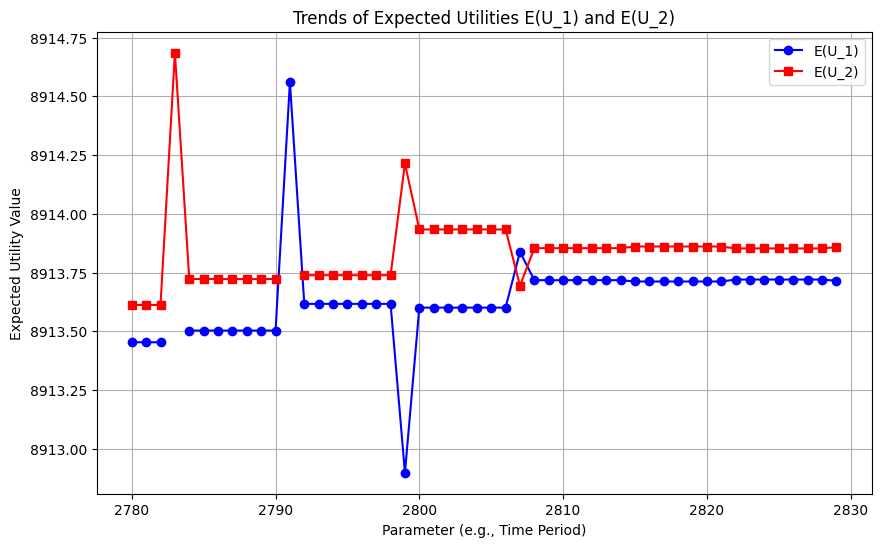

In [36]:
# 假设这些是根据模型计算得到的数据
parameter_range = range(len(E_U_1_t)-50, len(E_U_1_t))  # 假设参数范围，比如时间段1到10

# 使用matplotlib绘图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(parameter_range, E_U_1_t[len(E_U_1_t)-50:len(E_U_1_t)], '-o', label='E(U_1)', color='blue')
plt.plot(parameter_range, E_U_2_t[len(E_U_1_t)-50:len(E_U_1_t)], '-s', label='E(U_2)', color='red')

plt.title('Trends of Expected Utilities E(U_1) and E(U_2)')
plt.xlabel('Parameter (e.g., Time Period)')
plt.ylabel('Expected Utility Value')
plt.legend()
plt.grid(True)
plt.show()

E_U_1=293.73578643762687,E_U_2=276.48578643762687
E_U_1=293.7357878539823,E_U_2=276.4857864227257
E_U_1=293.7357893746458,E_U_2=276.4857864301763
E_U_1=293.7357864227257,E_U_2=276.4857878539823
E_U_1=293.7357864301763,E_U_2=276.4857893746458
E_U_1=293.73578642996455,E_U_2=276.4857867006324
E_U_1=293.73578644358736,E_U_2=276.48578720109964
E_U_1=-239281.33405786415,E_U_2=-138906.69815816908
E_U_1=2781.100514865556,E_U_2=2767.1280148652686
E_U_1=2781.1005157214045,E_U_2=2767.128014710222
E_U_1=2781.1005175076803,E_U_2=2767.1280147840575
E_U_1=2781.1005147105093,E_U_2=2767.128015721117
E_U_1=2781.1005147843443,E_U_2=2767.1280175073935
E_U_1=2781.1005148749277,E_U_2=2767.1280151239566
E_U_1=2781.1005148929034,E_U_2=2767.128015568662
E_U_1=-inf,E_U_2=-inf
E_U_1=4161.674943068218,E_U_2=4150.357218067988
E_U_1=4161.674943986152,E_U_2=4150.357217928446
E_U_1=4161.67494544494,E_U_2=4150.357217920391
E_U_1=4161.6749429286765,E_U_2=4150.3572189859215
E_U_1=4161.674942920623,E_U_2=4150.35722044470

C:\Users\dell\AppData\Local\Temp\ipykernel_20308\574494624.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  h_1 = 1 / np.sqrt(1 - u_1) - 1
C:\Users\dell\AppData\Local\Temp\ipykernel_20308\574494624.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  h_2 = 1 / np.sqrt(1 - u_2) - 1


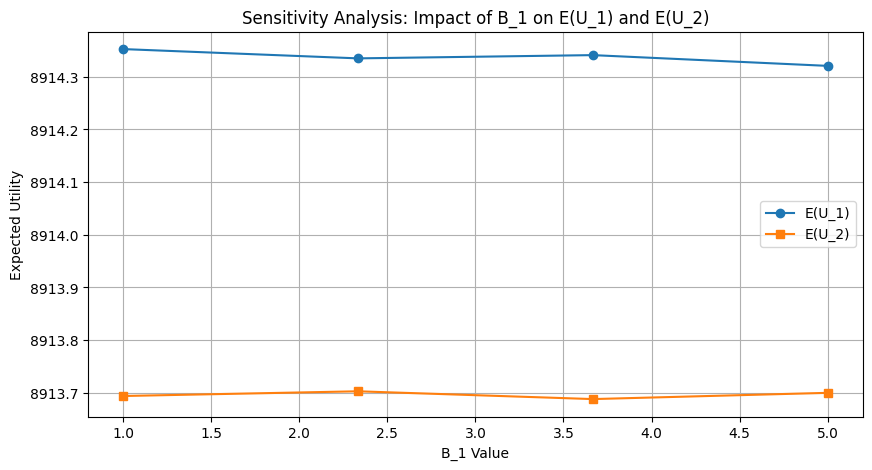

In [39]:
import numpy as np
from scipy.optimize import minimize
#拉格朗日算法，灵敏性分析 B_1
E_U_1_t=[]
E_U_2_t=[]
# Define the utility functions, constraints, and objective function

def optimize_with_B1(B_1_value):
    global E_U_1, E_U_2  # 使用全局变量来存储E_U_1和E_U_2的值

    def utility(vars):
         global E_U_1, E_U_2  # 再次声明以确保在这个作用域内使用全局变量
         Q_11, Q_12, Q_21, Q_22, u_1, u_2 = vars
         u_bar = (u_1 + u_2) / 2
         c_11 = 0.5 * Q_11**2 + Q_11
         c_12 = 0.25 * Q_12**2 + Q_12
         c_21 = 0.5 * Q_21**2 + Q_21
         c_22 = 0.25 * Q_22**2 + Q_22
    
         rho_1 = - (Q_11 + Q_21) + 0.1 * u_bar + 100
         rho_2 = -0.5 * (Q_12 + Q_22) + 0.2 * u_bar + 200
    
    # Calculate f_1 and f_2
         f_1 = rho_1 * Q_11 + rho_2 * Q_12 - c_11 - c_12
         f_2 = rho_1 * Q_21 + rho_2 * Q_22 - c_21 - c_22
    
    # Loss parameters and investment functions
         D_1, D_2 = 50, 70
         h_1 = 1 / np.sqrt(1 - u_1) - 1
         h_2 = 1 / np.sqrt(1 - u_2) - 1
    
    # Probability of successful attack
         p_1 = (1 - u_1) * (1 - u_bar)
         p_2 = (1 - u_2) * (1 - u_bar)
    
    # Calculate E(U_1) and E(U_2)
         E_U_2 = f_2 - D_2 * p_2 - h_2
         E_U_1 = f_1 - B_1_value * p_1 - h_1
         print(f"E_U_1={E_U_1},E_U_2={E_U_2}")
         E_U_1_t.append(E_U_1)
         E_U_2_t.append(E_U_2)
    
    # Our goal is to maximize the sum of E(U_1) and E(U_2), hence we minimize the negative sum
         return -(E_U_1 + E_U_2)
    result = minimize(utility, initial_guess, bounds=bounds, method='SLSQP')
    if result.success:
        optimized_vars = result.x
        max_utility = -result.fun
        return E_U_1, E_U_2
    else:
        return None, None
   
B_1_values = np.linspace(1, 5, 4)  # B_1的一系列值
E_U_1_results = []
E_U_2_results = []

for B_1 in B_1_values:
    E_U_1, E_U_2 = optimize_with_B1(B_1)
    E_U_1_results.append(E_U_1)
    E_U_2_results.append(E_U_2)

# 绘制结果图
plt.figure(figsize=(10, 5))
plt.plot(B_1_values, E_U_1_results, '-o', label='E(U_1)')
plt.plot(B_1_values, E_U_2_results, '-s', label='E(U_2)')
plt.xlabel('B_1 Value')
plt.ylabel('Expected Utility')
plt.title('Sensitivity Analysis: Impact of B_1 on E(U_1) and E(U_2)')
plt.legend()
plt.grid(True)
plt.show()

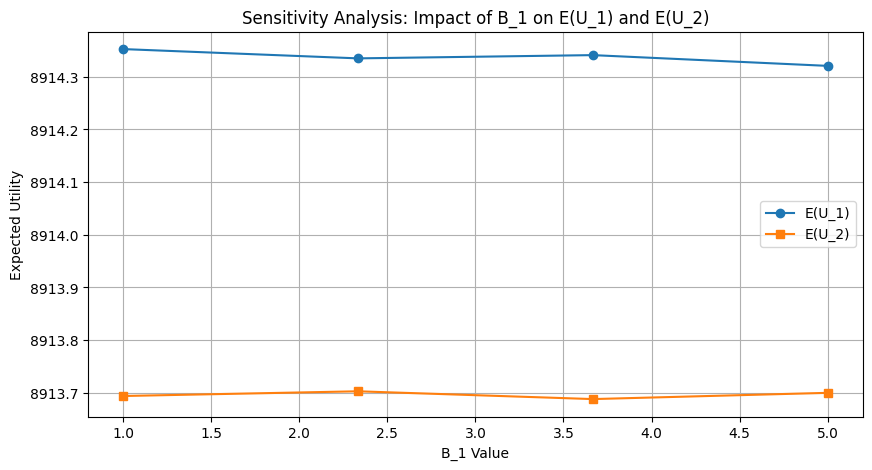

In [40]:
# 绘制结果图
plt.figure(figsize=(10, 5))
plt.plot(B_1_values, E_U_1_results, '-o', label='E(U_1)')
plt.plot(B_1_values, E_U_2_results, '-s', label='E(U_2)')
plt.xlabel('B_1 Value')
plt.ylabel('Expected Utility')
plt.title('Sensitivity Analysis: Impact of B_1 on E(U_1) and E(U_2)')
plt.legend()
plt.grid(True)
plt.show()

E_U_1=288.98578643762687,E_U_2=276.48578643762687
E_U_1=288.9857878539823,E_U_2=276.4857864227257
E_U_1=288.9857893746458,E_U_2=276.4857864301763
E_U_1=288.9857864227257,E_U_2=276.4857878539823
E_U_1=288.9857864301763,E_U_2=276.4857893746458
E_U_1=288.9857866423061,E_U_2=276.4857867006324
E_U_1=288.9857865143679,E_U_2=276.48578720109964
E_U_1=-inf,E_U_2=-inf
E_U_1=2777.253014867417,E_U_2=2767.128014867417
E_U_1=2777.253015723265,E_U_2=2767.1280147123703
E_U_1=2777.2530175095417,E_U_2=2767.1280147862053
E_U_1=2777.2530147123703,E_U_2=2767.128015723265
E_U_1=2777.2530147862053,E_U_2=2767.1280175095417
E_U_1=2777.253015067896,E_U_2=2767.128015126105
E_U_1=2777.253014958467,E_U_2=2767.12801557081
E_U_1=-215326.2279325431,E_U_2=-173727.8481976814
E_U_1=4158.558468069019,E_U_2=4150.357218068902
E_U_1=4158.558468986953,E_U_2=4150.35721792936
E_U_1=4158.558470445741,E_U_2=4150.357217921305
E_U_1=4158.558467929477,E_U_2=4150.3572189868355
E_U_1=4158.5584679214235,E_U_2=4150.357220445622
E_U_1=4

C:\Users\dell\AppData\Local\Temp\ipykernel_20308\574494624.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  h_1 = 1 / np.sqrt(1 - u_1) - 1
C:\Users\dell\AppData\Local\Temp\ipykernel_20308\574494624.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  h_2 = 1 / np.sqrt(1 - u_2) - 1


E_U_1=6848.6628678373345,E_U_2=6850.232180004972
E_U_1=6848.662867514372,E_U_2=6850.232180244905
E_U_1=-inf,E_U_2=-inf
E_U_1=7241.171432184929,E_U_2=7242.428667114561
E_U_1=7241.171432702501,E_U_2=7242.428666874872
E_U_1=7241.171433854999,E_U_2=7242.428666790188
E_U_1=7241.1714319452385,E_U_2=7242.428667632134
E_U_1=7241.1714318605555,E_U_2=7242.428668784631
E_U_1=7241.171432706845,E_U_2=7242.428667322191
E_U_1=7241.171432429921,E_U_2=7242.428667524389
E_U_1=-inf,E_U_2=-inf
E_U_1=7559.116608118006,E_U_2=7560.11920967059
E_U_1=7559.116608613244,E_U_2=7560.1192094253065
E_U_1=7559.116609680446,E_U_2=7560.11920931929
E_U_1=7559.116607872725,E_U_2=7560.119210165826
E_U_1=7559.116607766707,E_U_2=7560.119211233031
E_U_1=7559.116608584987,E_U_2=7560.119209870804
E_U_1=7559.11660835185,E_U_2=7560.119210036689
E_U_1=-3593673.411857899,E_U_2=-3417947.3825698546
E_U_1=7816.64679011896,E_U_2=7817.471514469219
E_U_1=7816.646790594236,E_U_2=7817.471514218937
E_U_1=7816.646791584521,E_U_2=7817.471514

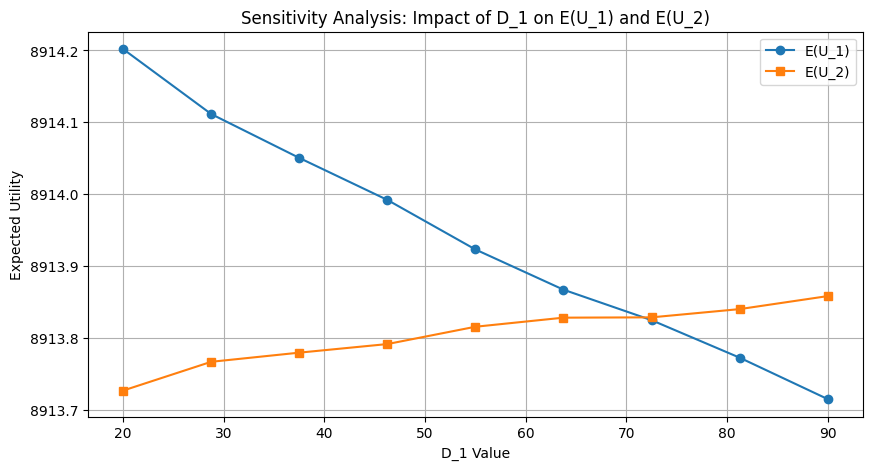

In [43]:
import numpy as np
from scipy.optimize import minimize
#拉格朗日算法，灵敏性分析 D_1
E_U_1_t=[]
E_U_2_t=[]
# Define the utility functions, constraints, and objective function

def optimize_with_D1(D_1_value):
    global E_U_1, E_U_2  # 使用全局变量来存储E_U_1和E_U_2的值

    def utility(vars):
         global E_U_1, E_U_2  # 再次声明以确保在这个作用域内使用全局变量
         Q_11, Q_12, Q_21, Q_22, u_1, u_2 = vars
         u_bar = (u_1 + u_2) / 2
         c_11 = 0.5 * Q_11**2 + Q_11
         c_12 = 0.25 * Q_12**2 + Q_12
         c_21 = 0.5 * Q_21**2 + Q_21
         c_22 = 0.25 * Q_22**2 + Q_22
    
         rho_1 = - (Q_11 + Q_21) + 0.1 * u_bar + 100
         rho_2 = -0.5 * (Q_12 + Q_22) + 0.2 * u_bar + 200
    
    # Calculate f_1 and f_2
         f_1 = rho_1 * Q_11 + rho_2 * Q_12 - c_11 - c_12
         f_2 = rho_1 * Q_21 + rho_2 * Q_22 - c_21 - c_22
    
    # Loss parameters and investment functions
         B_1, B_2 = 2.5, 2.5
         h_1 = 1 / np.sqrt(1 - u_1) - 1
         h_2 = 1 / np.sqrt(1 - u_2) - 1
    
    # Probability of successful attack
         p_1 = (1 - u_1) * (1 - u_bar)
         p_2 = (1 - u_2) * (1 - u_bar)
    
    # Calculate E(U_1) and E(U_2)
         E_U_2 = f_2 - D_2 * p_2 - h_2
         E_U_1 = f_1 - B_1_value * p_1 - h_1
         print(f"E_U_1={E_U_1},E_U_2={E_U_2}")
         E_U_1_t.append(E_U_1)
         E_U_2_t.append(E_U_2)
    
    # Our goal is to maximize the sum of E(U_1) and E(U_2), hence we minimize the negative sum
         return -(E_U_1 + E_U_2)
    result = minimize(utility, initial_guess, bounds=bounds, method='SLSQP')
    if result.success:
        optimized_vars = result.x
        max_utility = -result.fun
        return E_U_1, E_U_2
    else:
        return None, None
   
D_1_values = np.linspace(20, 90, 9)  # D_1的一系列值
E_U_1_results = []
E_U_2_results = []

for B_1 in B_1_values:
    E_U_1, E_U_2 = optimize_with_B1(B_1)
    E_U_1_results.append(E_U_1)
    E_U_2_results.append(E_U_2)

# 绘制结果图
plt.figure(figsize=(10, 5))
plt.plot(D_1_values, E_U_1_results, '-o', label='E(U_1)')
plt.plot(D_1_values, E_U_2_results, '-s', label='E(U_2)')
plt.xlabel('D_1 Value')
plt.ylabel('Expected Utility')
plt.title('Sensitivity Analysis: Impact of D_1 on E(U_1) and E(U_2)')
plt.legend()
plt.grid(True)
plt.show()

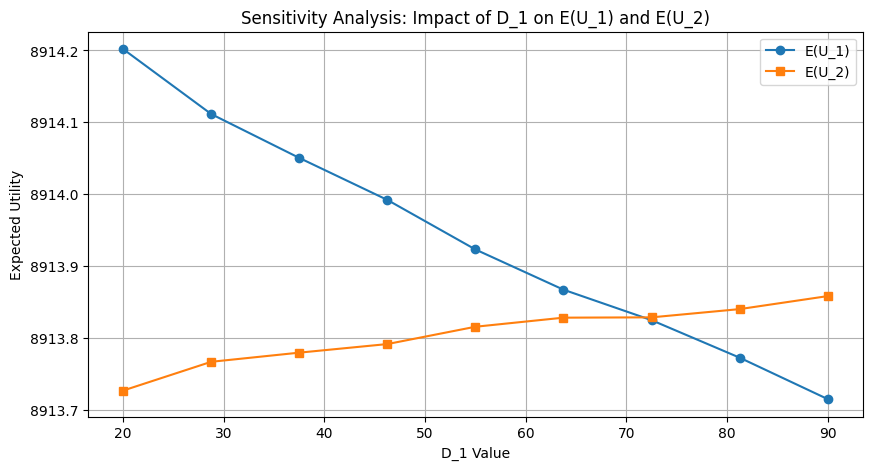

In [44]:
# 绘制结果图
plt.figure(figsize=(10, 5))
plt.plot(D_1_values, E_U_1_results, '-o', label='E(U_1)')
plt.plot(D_1_values, E_U_2_results, '-s', label='E(U_2)')
plt.xlabel('D_1 Value')
plt.ylabel('Expected Utility')
plt.title('Sensitivity Analysis: Impact of D_1 on E(U_1) and E(U_2)')
plt.legend()
plt.grid(True)
plt.show()

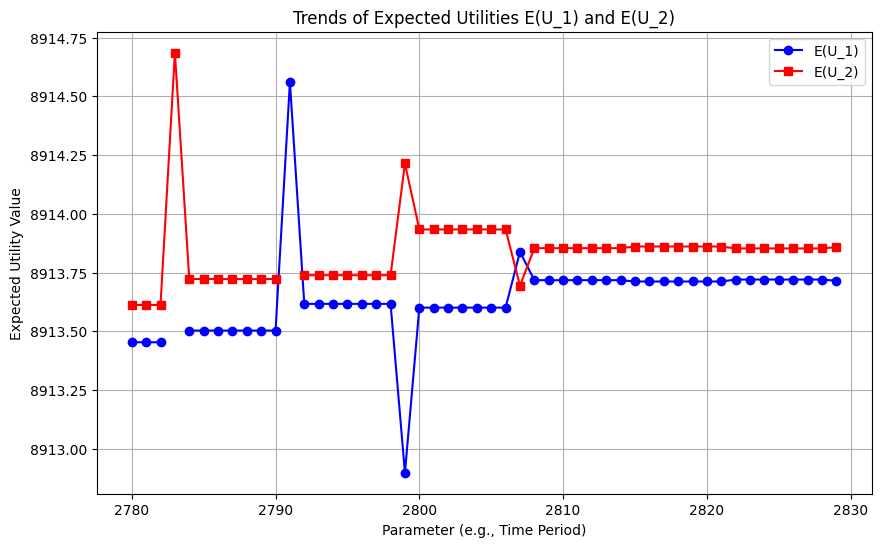

In [38]:
# 假设这些是根据模型计算得到的数据
parameter_range = range(len(E_U_1_t)-50, len(E_U_1_t))  # 假设参数范围，比如时间段1到10

# 使用matplotlib绘图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(parameter_range, E_U_1_t[len(E_U_1_t)-50:len(E_U_1_t)], '-o', label='E(U_1)', color='blue')
plt.plot(parameter_range, E_U_2_t[len(E_U_1_t)-50:len(E_U_1_t)], '-s', label='E(U_2)', color='red')

plt.title('Trends of Expected Utilities E(U_1) and E(U_2)')
plt.xlabel('Parameter (e.g., Time Period)')
plt.ylabel('Expected Utility Value')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
def objective(vars):
    Q_11, Q_12, Q_21, Q_22, u_1, u_2 = vars
    # 根据上述定义计算E(U_1)和E(U_2)，这里使用占位符代替具体实现
    E_U_1 = ... # 计算E(U_1)
    E_U_2 = ... # 计算E(U_2)
    return -(E_U_1 + E_U_2)  # 我们希望最大化总效用，因此返回其负值


In [27]:
import numpy as np
E_U_1_t=[]
E_U_2_t=[]
def objective(vars): #模拟退火算法
    Q_11, Q_12, Q_21, Q_22, u_1, u_2 = vars
    u_bar = (u_1 + u_2) / 2
    
    # 定义交易成本和需求价格函数
    c_11 = 0.5 * Q_11**2 + Q_11
    c_12 = 0.25 * Q_12**2 + Q_12
    c_21 = 0.5 * Q_21**2 + Q_21
    c_22 = 0.25 * Q_22**2 + Q_22
    
    # 需求价格函数
    rho_1 = - (Q_11 + Q_21) + 0.1 * u_bar + 100
    rho_2 = -0.5 * (Q_12 + Q_22) + 0.2 * u_bar + 200
    
    # 计算E(U_1)和E(U_2)
    E_U_1 = rho_1 * Q_11 + rho_2 * Q_12 - c_11 - c_12 - 50 * (1 - u_1) * (1 - u_bar) - (1 / np.sqrt(1 - u_1) - 1)
    E_U_2 = rho_1 * Q_21 + rho_2 * Q_22 - c_21 - c_22 - 70 * (1 - u_2) * (1 - u_bar) - (1 / np.sqrt(1 - u_2) - 1)
    E_U_1_t.append(E_U_1)
    E_U_2_t.append(E_U_2)
    print(f"E_U_1={E_U_1},E_U_2={E_U_2}")
    return -(E_U_1 + E_U_2)  # 返回负的总效用，因为我们想要最大化效用

def simulated_annealing(objective, bounds, initial_temp, cooling_rate, max_iterations):
    # 初始化
    current_temp = initial_temp
    solution = np.random.rand(len(bounds))
    for i, (lower, upper) in enumerate(bounds):
        solution[i] = lower + solution[i] * (upper - lower)
    current_eval = objective(solution)
    
    for iteration in range(max_iterations):
        # 在邻域内产生新的解
        candidate = np.copy(solution)
        for i in range(len(bounds)):
            candidate[i] += np.random.randn() * (bounds[i][1] - bounds[i][0]) * 0.1
            candidate[i] = np.clip(candidate[i], bounds[i][0], bounds[i][1])
        
        # 评估新解
        candidate_eval = objective(candidate)
        
        # 判断新解是否被接受
        if candidate_eval < current_eval or np.random.rand() < np.exp((current_eval - candidate_eval) / current_temp):
            solution, current_eval = candidate, candidate_eval
            
        # 冷却
        current_temp *= cooling_rate
    
    return solution, -current_eval  # 返回最优解和最大化的总效用

# 参数设置
initial_temp = 1000
cooling_rate = 0.99
max_iterations = 1000
bounds = [(0, 100), (0, 100), (0, 100), (0, 100), (0, 1), (0, 1)]  # 对应Q_11, Q_12, Q_21, Q_22, u_1, u_2的界限

# 执行模拟退火算法
opt_solution, max_utility = simulated_annealing(objective, bounds, initial_temp, cooling_rate, max_iterations)
print('Optimized Solution:', opt_solution)
print('Maximum Utility:', max_utility)


E_U_1=1021.013270813105,E_U_2=4352.709396653908
E_U_1=-3469.0843539966177,E_U_2=412.55494294408686
E_U_1=416.5844789760227,E_U_2=3767.418853895621
E_U_1=-1675.6579773226626,E_U_2=5616.118864000177
E_U_1=-1507.921762550153,E_U_2=7078.241878219385
E_U_1=613.3749793909143,E_U_2=7324.352592842643
E_U_1=1072.9250850604485,E_U_2=5978.543911072772
E_U_1=3202.785816893572,E_U_2=6241.869343852822
E_U_1=4767.665121836681,E_U_2=6981.0206634807355
E_U_1=3880.3365039241803,E_U_2=6584.36537960057
E_U_1=2220.5554754805216,E_U_2=6657.054997590837
E_U_1=4838.575249698476,E_U_2=7745.915596965658
E_U_1=7970.630140616545,E_U_2=8198.086491112146
E_U_1=6820.8042640291405,E_U_2=8087.327587828267
E_U_1=9340.08975389314,E_U_2=7352.127566885148
E_U_1=9315.355769238255,E_U_2=7132.384740466412
E_U_1=9553.423065945744,E_U_2=7444.2542878499435
E_U_1=9669.257420711896,E_U_2=6736.56476236062
E_U_1=8964.733077766792,E_U_2=6630.737754389148
E_U_1=6709.979720900088,E_U_2=7189.493776694756
E_U_1=10724.195167017147,E_U_2=

C:\Users\dell\AppData\Local\Temp\ipykernel_20308\3717382291.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  E_U_1 = rho_1 * Q_11 + rho_2 * Q_12 - c_11 - c_12 - 50 * (1 - u_1) * (1 - u_bar) - (1 / np.sqrt(1 - u_1) - 1)
C:\Users\dell\AppData\Local\Temp\ipykernel_20308\3717382291.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  E_U_2 = rho_1 * Q_21 + rho_2 * Q_22 - c_21 - c_22 - 70 * (1 - u_2) * (1 - u_bar) - (1 / np.sqrt(1 - u_2) - 1)


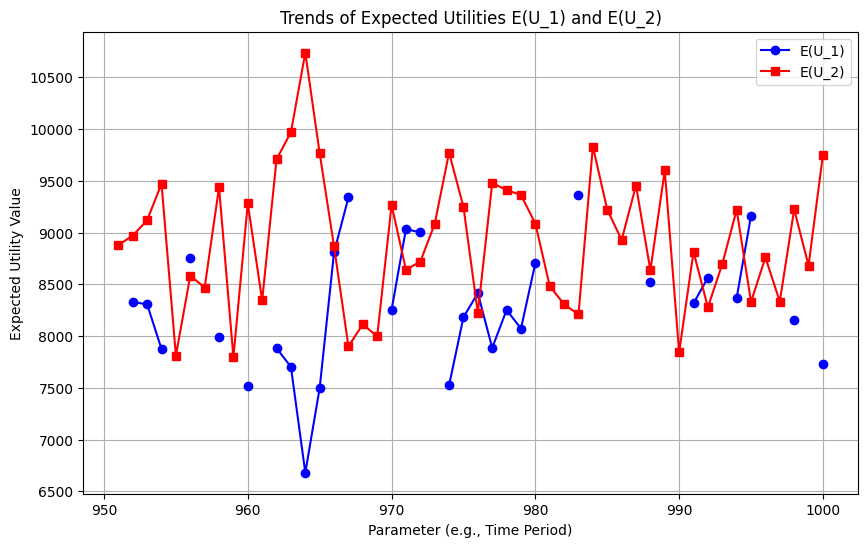

In [30]:
# 假设这些是根据模型计算得到的数据
parameter_range = range(len(E_U_1_t)-50, len(E_U_1_t))  # 假设参数范围，比如时间段1到10

# 使用matplotlib绘图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(parameter_range, E_U_1_t[len(E_U_1_t)-50:len(E_U_1_t)], '-o', label='E(U_1)', color='blue')
plt.plot(parameter_range, E_U_2_t[len(E_U_1_t)-50:len(E_U_1_t)], '-s', label='E(U_2)', color='red')

plt.title('Trends of Expected Utilities E(U_1) and E(U_2)')
plt.xlabel('Parameter (e.g., Time Period)')
plt.ylabel('Expected Utility Value')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import numpy as np
from scipy.optimize import minimize

# 参数定义
m, n = 2, 2  # 零售商和需求市场的数量
Q_xy_init = np.ones((m, n))  # 初始产品交易量
u_x_init = np.zeros(m)  # 初始安全水平
lambda_x = np.zeros(m)  # 初始拉格朗日乘数
Q_bar_xy = 100 * np.ones((m, n))  # 产品交易量上限
a_xy = np.array([[0.5, 0.25], [0.5, 0.25]])  # 交易成本函数参数a
b_xy = np.ones((m, n))  # 交易成本函数参数b
m_y = np.array([1, 0.5])  # 需求价格函数参数m
r_y = np.array([0.1, 0.2])  # 需求价格函数参数r
q_y = np.array([100, 200])  # 需求价格函数参数q
D_x = np.array([50, 70])  # 损失参数
B_x = np.array([2.5, 2.5])  # 预算
c_x = np.array([5, 10])  # 常数成本
t_x = np.array([1, 1])  # 市场份额占比，假设为1简化计算

# 定义交易成本函数
def c_xy(Q_xy):
    return a_xy * Q_xy**2 + b_xy * Q_xy

# 定义需求价格函数
def rho_y(Q, u):
    d = np.sum(Q, axis=0)  # 总需求
    return -m_y * d + r_y * (np.sum(u) / m) + q_y

# 定义投资函数
def h_x(u_x):
    return 1 / np.sqrt(1 - u_x) - 1

# 定义期望效用函数
def E_U(Q, u, x):
    p_x = (1 - u[x]) * (1 - np.mean(u)) * t_x[x]
    f_x = np.dot(rho_y(Q, u), Q[x]) - np.sum(c_xy(Q[x])) - c_x[x]
    return f_x - D_x[x] * p_x - h_x(u[x])

# 优化问题定义
def objective(vars):
    Q_11, Q_12, Q_21, Q_22, u_1, u_2 = vars
    Q = np.array([[Q_11, Q_12], [Q_21, Q_22]])
    u = np.array([u_1, u_2])
    return -(E_U(Q, u, 0) + E_U(Q, u, 1))  # 最大化E(U)相当于最小化-E(U)

# 约束条件
cons = (
    {'type': 'ineq', 'fun': lambda vars: B_x - h_x(vars[4:6])},  # 预算约束
    {'type': 'ineq', 'fun': lambda vars: vars - np.zeros(6)},  # 变量非负约束
    {'type': 'ineq', 'fun': lambda vars: Q_bar_xy.flatten() - vars[:4]}  # 交易量上限约束
)

# 初始猜测
x0 = np.concatenate((Q_xy_init.flatten(), u_x_init))

# 求解优化问题
res = minimize(objective, x0, constraints=cons, method='SLSQP')

# 继续优化问题的求解
if res.success:
    optimized_vars = res.x
    Q_optimized = optimized_vars[:4].reshape((m, n))
    u_optimized = optimized_vars[4:6]
    E_U1_optimized = E_U(Q_optimized, u_optimized, 0)
    E_U2_optimized = E_U(Q_optimized, u_optimized, 1)

    print("优化成功:", res.success)
    print(f"优化后的交易量 Q_11, Q_12, Q_21, Q_22: {Q_optimized.flatten()}")
    print(f"优化后的安全级别 u_1, u_2: {u_optimized}")
    print(f"优化后的零售商1期望效用 E(U_1): {E_U1_optimized}")
    print(f"优化后的零售商2期望效用 E(U_2): {E_U2_optimized}")
else:
    print("优化未成功, 原因:", res.message)

优化成功: True
优化后的交易量 Q_11, Q_12, Q_21, Q_22: [16.34835834 66.06126876 16.34893587 66.06127374]
优化后的安全级别 u_1, u_2: [0.91836735 0.91836735]
优化后的零售商1期望效用 E(U_1): 7340.1193067816
优化后的零售商2期望效用 E(U_2): 7335.005241843822


C:\Users\dell\AppData\Local\Temp\ipykernel_20308\1348315569.py:31: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(1 - u_x) - 1


In [22]:
import numpy as np
from scipy.optimize import minimize

# 定义参数
m, n = 2, 2  # 零售商和市场的数量
a_xy = np.array([[0.5, 0.25], [0.5, 0.25]])  # 交易成本函数参数a
b_xy = np.ones((m, n))  # 交易成本函数参数b
m_y = np.array([-1, -0.5])  # 需求价格函数参数m
r_y = np.array([0.1, 0.2])  # 需求价格函数参数r
q_y = np.array([100, 200])  # 需求价格函数参数q
D_x = np.array([50, 70])  # 损失参数
alpha_x = np.array([1, 1])  # 投资函数参数
B_x = np.array([2.5, 2.5])  # 预算
Q_bar = 100  # 交易量上限

# 定义函数
def c_xy(Q_xy, a_xy, b_xy):
    return a_xy * Q_xy ** 2 + b_xy * Q_xy

def rho_y(Q_xy, u_x, m_y, r_y, q_y, m):
    return -m_y * np.sum(Q_xy, axis=0) + r_y * (np.sum(u_x) / m) + q_y

def h_x(u_x, alpha_x):
    return alpha_x * (1 / np.sqrt(1 - u_x) - 1)

def E_U(Q_xy, u_x, x, a_xy, b_xy, m_y, r_y, q_y, D_x, alpha_x, m):
    c_xy_val = c_xy(Q_xy[x], a_xy[x], b_xy[x])
    rho_y_val = rho_y(Q_xy, u_x, m_y, r_y, q_y, m)
    h_x_val = h_x(u_x[x], alpha_x[x])
    p_x = (1 - u_x[x]) * (1 - np.mean(u_x))
    f_x = np.dot(rho_y_val, Q_xy[x]) - np.sum(c_xy_val)
    return f_x - D_x[x] * p_x - h_x_val

# 优化目标函数
def objective(vars):
    Q_11, Q_12, Q_21, Q_22, u_1, u_2 = vars[:6]
    Q_xy = np.array([[Q_11, Q_12], [Q_21, Q_22]])
    u_x = np.array([u_1, u_2])
    E_U1 = E_U(Q_xy, u_x, 0, a_xy[0], b_xy[0], m_y, r_y, q_y, D_x, alpha_x, m)
    E_U2 = E_U(Q_xy, u_x, 1, a_xy[1], b_xy[1], m_y, r_y, q_y, D_x, alpha_x, m)
    return -(E_U1 + E_U2)  # Minimize negative sum of utilities

# 约束条件和边界
constraints = (
    {'type': 'ineq', 'fun': lambda x: B_x - h_x(x[4:6], alpha_x)},
    {'type': 'ineq', 'fun': lambda x: x[0:4] - 0},  # Q_xy >= 0
    {'type': 'ineq', 'fun': lambda x: 100 - x[0:4]},  # Q_xy <= Q_bar
    {'type': 'ineq', 'fun': lambda x: 1 - x[4:6]},  # u_x <= 1
    {'type': 'ineq', 'fun': lambda x: x[4:6]}  # u_x >= 0
)
bounds = [(0, Q_bar)] * 4 + [(0, 1)] * 2

# 初始猜测
x0 = [1.0, 1.0, 1.0, 1.0, 0.0, 0.0]  # 根据题目要求设置的初始值

# 使用scipy的minimize函数进行优化
result = minimize(objective, x0, method='SLSQP', constraints=constraints, bounds=bounds)

if result.success:
    optimized_vars = result.x
    Q_optimized = optimized_vars[:4].reshape((m, n))
    u_optimized = optimized_vars[4:6]
    # 重新计算最优的期望效用值
    E_U1_optimized = E_U(Q_optimized, u_optimized, 0, a_xy[0], b_xy[0], m_y, r_y, q_y, D_x, alpha_x, m)
    E_U2_optimized = E_U(Q_optimized, u_optimized, 1, a_xy[1], b_xy[1], m_y, r_y, q_y, D_x, alpha_x, m)
    
    print("优化成功")
    print(f"优化后的交易量 Q_11, Q_12, Q_21, Q_22: {Q_optimized.flatten()}")
    print(f"优化后的安全级别 u_1, u_2: {u_optimized}")
    print(f"优化后的零售商1期望效用 E(U_1): {E_U1_optimized}")
    print(f"优化后的零售商2期望效用 E(U_2): {E_U2_optimized}")
else:
    print("优化失败，原因：", result.message)


C:\Users\dell\AppData\Local\Temp\ipykernel_20308\3507014977.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  return alpha_x * (1 / np.sqrt(1 - u_x) - 1)
C:\Users\dell\AppData\Local\Temp\ipykernel_20308\3507014977.py:24: RuntimeWarning: divide by zero encountered in divide
  return alpha_x * (1 / np.sqrt(1 - u_x) - 1)


优化成功
优化后的交易量 Q_11, Q_12, Q_21, Q_22: [100. 100. 100. 100.]
优化后的安全级别 u_1, u_2: [0.91836735 0.91836735]
优化后的零售商1期望效用 E(U_1): 49824.71782590796
优化后的零售商2期望效用 E(U_2): 54824.58454810797


In [26]:
B1_values = np.linspace(start=0.5*B1_initial, stop=1.5*B1_initial, num=20)  # B1的变化范围
u1_results = []
Qxy_results = []
EU1_results = []

for B1 in B1_values:
    u1, Qxy, EU1 = optimize(B1)  # 假设的求解函数
    u1_results.append(u1)
    Qxy_results.append(Qxy)
    EU1_results.append(EU1)

# 分析和可视化结果
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(B1_values, u1_results, '-o')
plt.title("u1 vs B1")

plt.subplot(1, 3, 2)
plt.plot(B1_values, Qxy_results, '-o')
plt.title("Qxy vs B1")

plt.subplot(1, 3, 3)
plt.plot(B1_values, EU1_results, '-o')
plt.title("EU1 vs B1")

plt.tight_layout()
plt.show()


NameError: name 'optimize' is not defined